In [22]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

vehicles_data_set = pd.read_csv('/home/jovyan/work/datasets/vehicles_cleaned.csv')
vehicles_data_set.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission,type,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [9]:
X = vehicles_data_set.copy()

y = vehicles_data_set['price']

X.drop(columns=['price'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.6,
    random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_test,
    y_test,
    train_size=0.5,
    random_state=42
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((256128, 8), (256128,), (85376, 8), (85376,), (85376, 8), (85376,))

In [10]:
X_train.reset_index(drop=True, inplace=True)

In [21]:
year_simple_imputer = SimpleImputer()

year_imputed_values = year_simple_imputer.fit_transform(
    np.reshape(
        X_train['year'],
        (-1,1)
    )
)

X_train.drop(columns=['year'], inplace=True)
X_train = pd.concat(
    [
        X_train,
        pd.Series(
            year_imputed_values[:,0],
            name='year'
        )
    ], axis=1
)

X_train['year'] = X_train['year'].astype('int64')
X_train['year'].dtype

years_sorted = sorted(X_train['year'].unique())

for year_sorted in years_sorted:
    print(
        year_sorted,
        '---------',
        sum(X_train['year'] == year_sorted)
    )

1900 --------- 10
1901 --------- 1
1903 --------- 8
1905 --------- 1
1909 --------- 1
1913 --------- 1
1916 --------- 2
1918 --------- 1
1920 --------- 1
1921 --------- 2
1922 --------- 3
1923 --------- 24
1924 --------- 5
1925 --------- 4
1926 --------- 9
1927 --------- 21
1928 --------- 22
1929 --------- 42
1930 --------- 44
1931 --------- 36
1932 --------- 35
1933 --------- 19
1934 --------- 26
1935 --------- 16
1936 --------- 26
1937 --------- 46
1938 --------- 24
1939 --------- 31
1940 --------- 54
1941 --------- 37
1942 --------- 10
1943 --------- 1
1944 --------- 3
1945 --------- 2
1946 --------- 30
1947 --------- 50
1948 --------- 60
1949 --------- 54
1950 --------- 58
1951 --------- 56
1952 --------- 64
1953 --------- 64
1954 --------- 59
1955 --------- 136
1956 --------- 95
1957 --------- 112
1958 --------- 47
1959 --------- 59
1960 --------- 70
1961 --------- 42
1962 --------- 78
1963 --------- 155
1964 --------- 164
1965 --------- 222
1966 --------- 253
1967 --------- 219
1

<Axes: xlabel='year'>

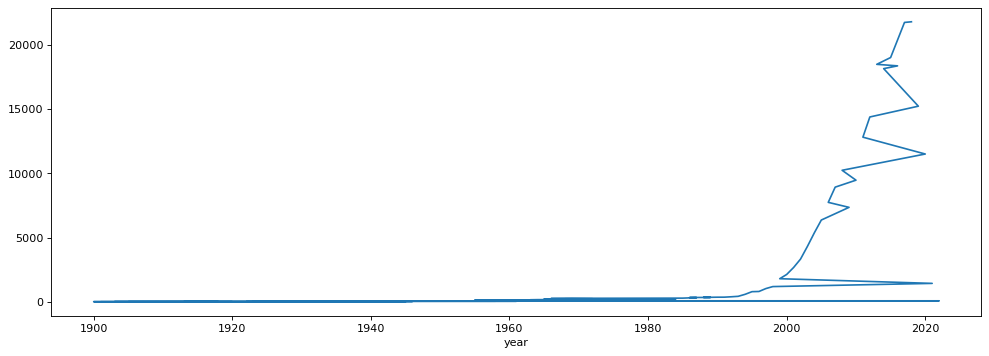

In [34]:
plt.figure(figsize=(15, 5), dpi=80)
X_train['year'].value_counts().plot()